In [63]:
# Covid 19 Analysis

### Dataset parsing
- - -

SyntaxError: invalid syntax (<ipython-input-63-75b79b10d317>, line 4)

In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('data/covid_19_world.csv', delimiter=',')

In [66]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
26395,NaN,Western Sahara,24.215500,-12.885800,4/30/20,6,0,5
26396,NaN,Sao Tome and Principe,0.186360,6.613081,4/30/20,14,0,4
26397,NaN,Yemen,15.552727,48.516388,4/30/20,6,2,0
26398,NaN,Comoros,-11.645500,43.333300,4/30/20,1,0,0


In [67]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,26400.000000,26400.000000,2.640000e+04,26400.000000,26400.000000
mean,21.374285,22.860921,2.789315e+03,179.371477,716.273447
std,24.754116,70.377900,2.681237e+04,1849.994211,5919.897092
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.969250,-16.237775,0.000000e+00,0.000000,0.000000
50%,23.659750,20.972650,8.000000e+00,0.000000,0.000000
75%,41.166075,78.750000,2.230000e+02,3.000000,25.000000
max,71.706900,178.065000,1.069424e+06,62996.000000,153947.000000


In [68]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

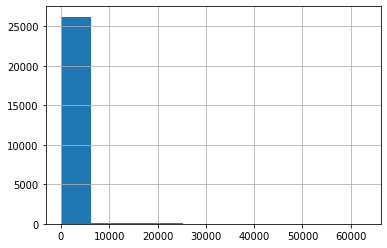

In [69]:
df.loc[:, 'Deaths'].hist()

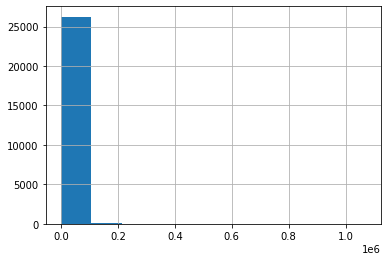

In [70]:
df.loc[:, 'Confirmed'].hist()

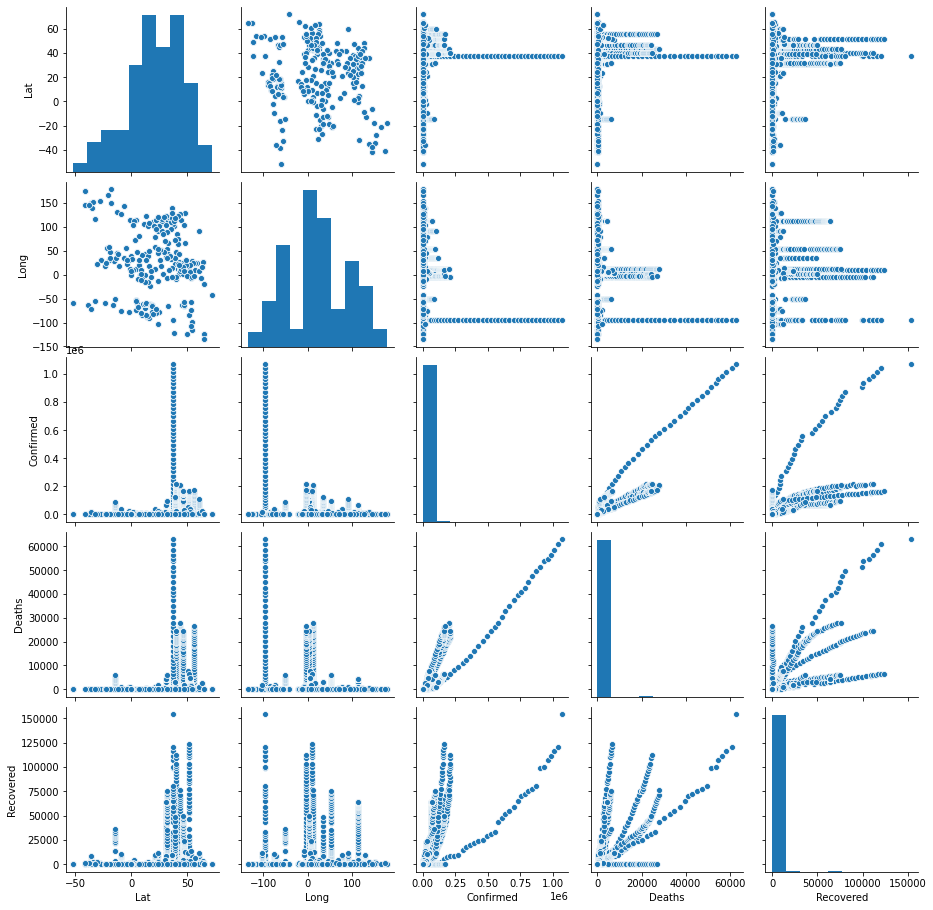

In [71]:
sb.pairplot(df)

In [72]:
# verification of null values
df.loc[df['Date'].isnull() |
      df['Confirmed'].isnull() |
      df['Deaths'].isnull() |
      df['Recovered'].isnull()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered


In [73]:
# verification of NA values
df.loc[df['Date'].isna() |
      df['Confirmed'].isna() |
      df['Deaths'].isna() |
      df['Recovered'].isna()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered


In [74]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [75]:
df["Date"] = pd.to_datetime(df["Date"])

In [76]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

### Prediction using Support Vector Machine
- - -

In [77]:
first_day = df["Date"].min()

In [78]:
first_day

Timestamp('2020-01-22 00:00:00')

In [79]:
df["num_days_from_begin"] = (df["Date"] - first_day).astype('timedelta64[D]')

In [80]:
df["num_days_from_begin"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
26395    99.0
26396    99.0
26397    99.0
26398    99.0
26399    99.0
Name: num_days_from_begin, Length: 26400, dtype: float64

In [81]:
df.loc[df["num_days_from_begin"] == 99]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,num_days_from_begin
26136,NaN,Afghanistan,33.000000,65.000000,2020-04-30,2171,64,260,99.0
26137,NaN,Albania,41.153300,20.168300,2020-04-30,773,31,470,99.0
26138,NaN,Algeria,28.033900,1.659600,2020-04-30,4006,450,1779,99.0
26139,NaN,Andorra,42.506300,1.521800,2020-04-30,745,42,468,99.0
26140,NaN,Angola,-11.202700,17.873900,2020-04-30,27,2,7,99.0
...,...,...,...,...,...,...,...,...,...
26395,NaN,Western Sahara,24.215500,-12.885800,2020-04-30,6,0,5,99.0
26396,NaN,Sao Tome and Principe,0.186360,6.613081,2020-04-30,14,0,4,99.0
26397,NaN,Yemen,15.552727,48.516388,2020-04-30,6,2,0,99.0
26398,NaN,Comoros,-11.645500,43.333300,2020-04-30,1,0,0,99.0


In [82]:
# lists for the world (general) data
world_cases = []
total_deaths = [] 
world_mortality_rate = []
world_recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# lists for the China data
china_cases = []
china_deaths = []
china_mortality_rate = []
china_recovery_rate = []
china_recovered = []
china_active = []

# get max number of days
max_days = int(df["num_days_from_begin"].max())

# for each day...
for i in range(max_days + 1):
    # extract the dataframe containing values for that day
    day_df = df.loc[df["num_days_from_begin"] == i]
    
    confirmed_total_sum = day_df["Confirmed"].sum()
    death_total_sum = day_df["Deaths"].sum()
    recovery_total_sum = day_df["Recovered"].sum()
    
    # extract general worldwide data
    world_cases.append(confirmed_total_sum)
    total_deaths.append(death_total_sum)
    total_recovered.append(recovery_total_sum)
    world_mortality_rate.append(death_total_sum / confirmed_total_sum)
    world_recovery_rate.append(recovery_total_sum / confirmed_total_sum)
    total_active.append(confirmed_total_sum - death_total_sum - recovery_total_sum)
    
    # extract the dataframe containing values for that day, for China only
    china_day_df = day_df.loc[df["Country/Region"] == "China"]
    
    china_confirmed_total_sum = china_day_df["Confirmed"].sum()
    china_death_total_sum = china_day_df["Deaths"].sum()
    china_recovery_total_sum = china_day_df["Recovered"].sum()
    
    # extract China data
    china_cases.append(china_confirmed_total_sum)
    china_deaths.append(china_death_total_sum)
    china_recovered.append(china_recovery_total_sum)
    china_mortality_rate.append(china_death_total_sum / china_confirmed_total_sum)
    china_recovery_rate.append(china_recovery_total_sum / china_confirmed_total_sum)
    china_active.append(china_confirmed_total_sum - china_death_total_sum - china_recovery_total_sum)

In [83]:
# obtain daily increases for world and China
world_cases_var = []
total_deaths_var = []
total_recovered_var = []

china_cases_var = []
china_deaths_var = []
china_recovered_var = []

# function to get increases/decreases of values in a list
def get_list_variation(in_list):
    out_list = []
    for idx, elem in enumerate(in_list):
        if idx == 0:
            out_list.append(elem)
        else:
            out_list.append(elem - in_list[idx - 1])
    return out_list

# obtain daily increases/decreases
world_cases_var = get_list_variation(world_cases)
total_deaths_var = get_list_variation(total_deaths)
total_recovered_var = get_list_variation(total_recovered)

china_cases_var = get_list_variation(china_cases)
china_deaths_var = get_list_variation(china_deaths)
china_recovered_var = get_list_variation(china_recovered)

In [84]:
import numpy as np

# reshape arrays for scikit-learn
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [85]:
# definition of array containing the number of days from the beginning, to predict in the future
days_in_future = 50
num_days_to_future = np.array([i for i in range(max_days + days_in_future)]).reshape(-1, 1)

In [86]:
import datetime as dt

# creation of array with date objects, for better visualization
start_date = dt.datetime.strptime('22-1-2020', '%d-%m-%Y')
num_days_to_future_dates = []
for i in range(len(num_days_to_future)):
    num_days_to_future_dates.append((start_date + dt.timedelta(days=i)).strftime('%d-%m-%Y'))

In [87]:
num_days_since_begin = np.unique(df["num_days_from_begin"].values).reshape(-1, 1)

from sklearn.model_selection import train_test_split

# selection of the train and test groups, for confirmed cases. Test size is 25% of all data; it is the last 25 days of the recorded data (shuffle is false)
x_world_conf_train, x_world_conf_test, y_world_conf_train, y_world_conf_test = train_test_split(num_days_since_begin, world_cases, test_size=0.25, shuffle=False)

In [88]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

"""
# choose most effective parameters for the support vector machine
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
degree = [3, 4, 5]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}
svm = SVR(kernel='poly')

svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(x_world_conf_train, y_world_conf_train)

print('Best score: {}'.format(svm_search.best_score_))
print('Best parameters: {}'.format(svm_search.best_params_))
"""

# choosing almost random parameters for the super vector machine
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
svm_confirmed.fit(x_world_conf_train, y_world_conf_train)
svm_pred = svm_confirmed.predict(num_days_to_future)

/home/mike/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 357515.931229383
MSE: 135456683608.66678


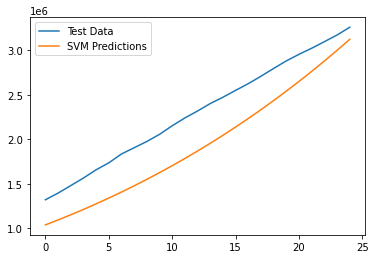

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# check the prediction against the testing data
svm_test_prediction = svm_confirmed.predict(x_world_conf_test)
plt.plot(y_world_conf_test)
plt.plot(svm_test_prediction)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_prediction, y_world_conf_test))
print('MSE:', mean_squared_error(svm_test_prediction, y_world_conf_test))

In [90]:
# transform the data for bayesian ridge regression
from sklearn.preprocessing import PolynomialFeatures

bayesian_polynomial = PolynomialFeatures(degree=4)
bayesian_x_world_conf_train = bayesian_polynomial.fit_transform(x_world_conf_train)
bayesian_x_world_conf_test = bayesian_polynomial.fit_transform(x_world_conf_test)
bayesian_num_days_to_future = bayesian_polynomial.fit_transform(num_days_to_future)

In [91]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

# choose the best hyper parameters for the bayesian ridge method
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = GridSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, verbose=1)
bayesian_search.fit(bayesian_x_world_conf_train, y_world_conf_train)

Fitting 3 folds for each of 6250 candidates, totalling 18750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2048 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 17862 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 18750 out of 18750 | elapsed:    9.0s finished
/home/mike/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=False,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001, 0.001],
                         'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001, 0.001],
                         'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001, 0.001],
                         'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001, 0.001],
                         'normalize': [True, False],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_job

In [92]:
bayesian_search.best_params_

{'alpha_1': 0.001,
 'alpha_2': 1e-06,
 'lambda_1': 1e-07,
 'lambda_2': 0.001,
 'normalize': True,
 'tol': 1e-06}

MAE: 363033.17733016476
MSE: 272813619677.17075


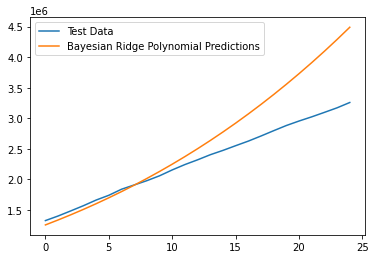

In [93]:
# extract the best estimator (with the best hyper parameters) and compute errors and graphic for comparison
bayesian_confirmed = bayesian_search.best_estimator_
bayesian_test_prediction = bayesian_confirmed.predict(bayesian_x_world_conf_test)
plt.plot(y_world_conf_test)
plt.plot(bayesian_test_prediction)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])
print('MAE:', mean_absolute_error(bayesian_test_prediction, y_world_conf_test))
print('MSE:',mean_squared_error(bayesian_test_prediction, y_world_conf_test))